# Escolhendo Ramen(Lámen) por Inferência Bayesiana

O "rãmen", que por aqui é chamado de "lámen", é um prato composto pelo macarrão característico (amarelo e de textura firme), imerso em uma sopa fumegante com caldos à base de ossos de porco, peixe, frango ou somente legumes, além de um tempero que, em geral, envolve shoyo, missô, cebolinha, pimenta, entre outras especiarias a gosto. Costuma ser acompanhado e legumes, verduras, carnes, ovos, brotos e bambu ou soja, algas marinhas ou frutos do mar.

Lamian, forma original da escrita, nasceu na China e chegou no Japão no século XIX. Por conta da falta de comida no Japão pós-Guerra, os EUA enviaram toneladas de trigo para alimentar a população - e foi aí que o governo japonês incentivou a produção de macarrão de trigo (o que não era comum na dieta dos japonese, até então). A forma japonesa de pronunciar lamian é "rãmen", por isso podemos dizer que esta é a forma certa de se refeir ao prato japonês. 

## Objetivo do projeto

Ramen é uma das minhas comidas favoritas, principalmente o ramen comercial que é muitas vezes chamado e macarrão instantâneo. Por isso surgiu o interesse em ter um projeto de negócio desse produto. No Brasil, temos as marcas *Nissin Lámen*, *Maggi*, *Renata*, *Stella D'Oro*, *ADRIA*, *PANCO*, *Predilecta*. **O objetivo é criar um modelo que escolha uma nova marca estrangeira de ramen que possar agradar o consumidor brasileiro.**

## Parte 1 - Pré-Selecão de Novas Marcas

Escolher quatro novas marcas estrangeiras de ramen usando como critério de seleção as avaliações dadas pelos consumidores de outros país.

### 1.1 Entendendo os dados

O dataset usado neste projeto foi retirado do *Kaggle*, a maior comunidade de data science o mundo. 

Link do dataset: <a href="url" target="https://www.kaggle.com/samuelvedrik/ramen-ratings-latest-update-jan-25-2020"> Ramen Ratings </a>

Cada linha possui 7 colunas:

* ID: o ID único de cada ramen

* URL: o URL para a revisão de cada ramen

* Brand: a marca do fabricante de ramen

* Variety: o nome específico do ramen

* Style: Embalagem do ramen

* Country: País de origem

* Stars: a classificação do ramen no site <a href="url" target="https://www.theramenrater.com/"> theramenrater </a>.

In [1]:
# Importando as bibliotecas 

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sn

import pymc3 as pm 

In [2]:
# Importando os dados

ramen =  pd.read_csv("Ramen_ratings_2020.csv")
pd.concat([ramen.head(), ramen.tail()]) # Mostra as 5 primeiras e as 5 últimas linhas

,ID,URL,Brand,Variety,Style,Country,Stars
0,3473,https://www.theramenrater.com/2020/04/05/3473-...,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5
1,3472,https://www.theramenrater.com/2020/04/05/3472-...,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5
2,3471,https://www.theramenrater.com/2020/04/05/3471-...,Ve Wong,Instant Oriental Noodles Soup Chinese Herb - G...,Pack,Taiwan,3.75
3,3470,https://www.theramenrater.com/2020/04/04/3470-...,Myojo,Ippeichan Rich & Sweet Yakisoba,Tray,Japan,5
4,3469,https://www.theramenrater.com/2020/04/03/3469-...,Mykuali,Penang Hokkien Prawn Rice Vermicelli Soup,Bowl,Malaysia,5
3468,5,https://www.theramenrater.com/2009/06/22/vifon...,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3469,4,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1
3470,3,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2
3471,2,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2
3472,1,https://www.theramenrater.com/2009/06/22/westb...,Westbrae,Miso Ramen,Pack,United States,0.5


In [3]:
# Tamanho do dataset
print('O dataset possui:')
print('Número de linhas:', ramen.shape[0])
print('Número de colunas:', ramen.shape[1])

O dataset possui:
Número de linhas: 3473
Número de colunas: 7


In [4]:
# Informações dos tipos de dados
ramen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       3473 non-null   object
 1   URL      3473 non-null   object
 2   Brand    3473 non-null   object
 3   Variety  3473 non-null   object
 4   Style    3473 non-null   object
 5   Country  3473 non-null   object
 6   Stars    3473 non-null   object
dtypes: object(7)
memory usage: 190.1+ KB


O conjunto de dados possui todas as colunas de dados categóricos (Dtype:object). Porém, sabemos da primeira visualização, que a coluna "Stars" não é de texto, mas de números salvos em formato de 'string'. Assim, temos de convertê-la em tipo numérico para analisá-la.

In [5]:
# Converte a coluna 'Stars' para numérico
ramen['Stars']=pd.to_numeric(ramen['Stars'], errors='coerce') 
# O parâmetro "coerce" transforma os dados inválidos em NaN 

Vamos dar uma olhada nas estatísticas da coluna "Stars"

In [6]:
# Estatística dos valores da coluna 
ramen['Stars'].describe()

count    3458.000000
mean        3.702834
std         1.040184
min         0.000000
25%         3.250000
50%         3.750000
75%         4.500000
max         5.000000
Name: Stars, dtype: float64

A coluna "Stars" pontua os diferentes tipos de ramen com valores que variam entre 0.00 e 5.00, sendo o valor da mediana de 3.75 e a média de todas as pontuações de 3.70.

Os três tipos de ramen mais consumidos são os de pacote(pack), tigela(bowl) e copo(cup), nessa ordem. Essa é uma informação importante, a que determina quais são os tipos de produtos mais vendidos.

### 1.2 Limpando os Dados

Os dados brutos não estão em um formato onde as informação possam ser obtidas, por isso precisamos realizar um pré-processamento do dataset onde limpamos e organizamos os dados e colunas.

In [7]:
# Verificar se existem valors faltantes NaN
ramen.isna().sum()

ID          0
URL         0
Brand       0
Variety     0
Style       0
Country     0
Stars      15
dtype: int64

As colunas Stars possue 15 valores faltentes. Essa é acoluna mais importante, pois é ela que fornece as avaliações usadas para relizar o estudo das melhores marcar.

Como 15 linhas é uma parcela muito pequena comparada as 3473 linhas do dataset, e pecisamos das avaliações dos consumidores para realizar a pré-selecão, podemos excluir essas linhas sem nos preocuparmos em perda de informação.

In [8]:
# Apaga as linhas com dados faltantes
ramen = ramen.dropna(axis=0)

In [9]:
# Altera o nomee com grafia diferente ou errados na coluna 'Country'
ramen['Country'] = ramen['Country'].replace('Hong Kong', 'China')
ramen['Country'] = ramen['Country'].replace('USA', 'United States')
ramen['Country'] = ramen['Country'].replace('Souh Korea', 'South Korea')
ramen['Country'] = ramen['Country'].replace('UK', 'United Kingdom')

In [10]:
# Salva o dataset limpo
ramen.to_csv('ramen2020_limpo.csv')

### 1.3 Explorando os Dados

Nessa seção começamos a visualizar e analisar os dados para pré-selecionar novas marcas.

Vamos começar contabilizando a variedade de produtos de ramen em diferentes países.

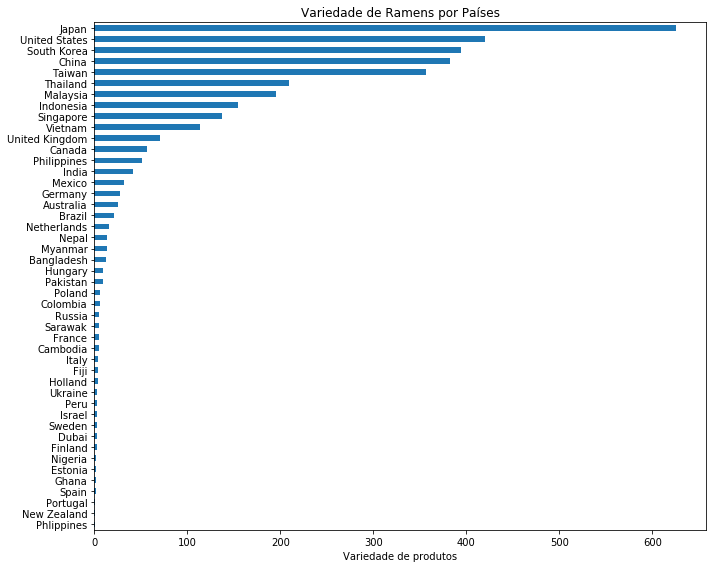

In [11]:
# Contabiliza a quantidade de produtos em cada país países
paises = ramen['Country'].value_counts().sort_values(ascending=True) 

plt.figure(figsize=(10,8))
paises.plot(kind='barh', title="Variedade de Ramens por Países" )
plt.xlabel('Variedade de produtos')
plt.tight_layout()
plt.show()

Os países asiáticos (Japão, Coréia do Sul, Taiwan, China, Tailândia), juntamente com Estados Unidos, são os países com a maior variedades de tipos de ramen. Na primeira etapa da pré-seleção, **os países com maior variedade/consumo de ramen, Japão, Estados Unidos e Coréia do Sul foram os escolhidos**.

Podemos estar curiosos em saber quais são as marcas, em todos os países, com maior variedade de produtos.

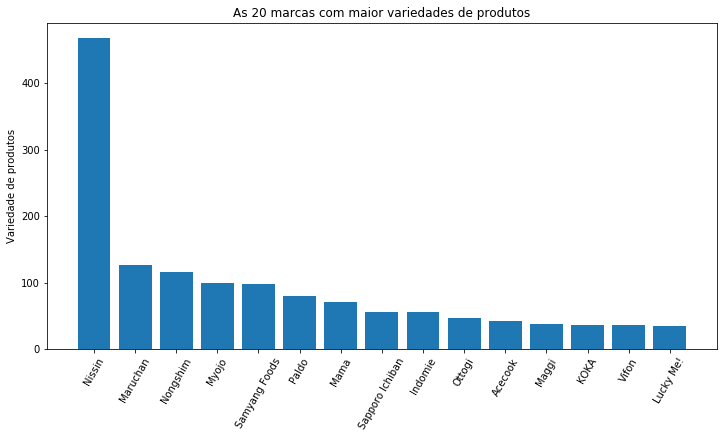

In [12]:
# contabiliza as 20 marcas com maior variedades de produtos
marca = ramen['Brand'].value_counts()[:15] 

plt.figure(figsize=(12,6))
plt.bar(marca.index, marca.values)
plt.title("As 20 marcas com maior variedades de produtos")
plt.ylabel('Variedade de produtos')
plt.xticks(rotation=60)
plt.show()

A marca *Nissin* é a que possui a maior variedade de tipos de ramens comerciais. Como essa é uma marca que já existe no país, ela não será escolhida na seleção. Porém, o fato de ser uma marca conhecida pelos consumidores brasileiros pode ser usada como medida e comparação com o paladar de consumidores de outros países.

Outro fator importante na escolha do ramen é o tipo de embalagem que o ramem é vendido.

In [13]:
# Contabiliza os diferentes tipos de embalagens de ramen
estilo = ramen['Style'].value_counts()
estilo

Pack          1969
Bowl           671
Cup            607
Tray           156
Box             50
Restaurant       3
Bar              1
Can              1
Name: Style, dtype: int64

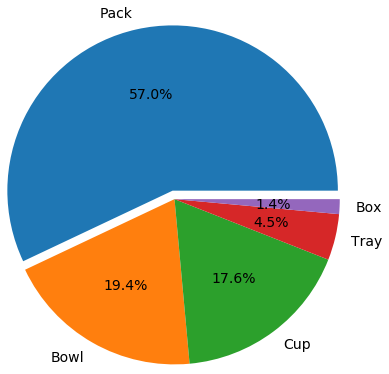

In [14]:
# Tipos e embalagens mais vendidas
plt.pie(estilo[0:5],autopct="%3.01f%%",radius=1.9,explode=[0.1,0,0,0,0], labels=estilo[0:5].index,
       textprops={'fontsize': 14})
plt.show()

Os ramens com **embalagem do tipo pack(pacote) são as mais vendidas**, seguida pelo tipo bowl(tijela) e cup(copo). 

O dataset não forne informações com os preços dos produtos, mas podemos especular, através da experiência do di-a-dia, que os pacotes são mais baratos (embora algumas vezes menos saboroso que os em tijela e copo), e esse fator determina a preferência por esse tipo e embalagem.

Vamos estudar a distribuição das avaliações dos ramens.

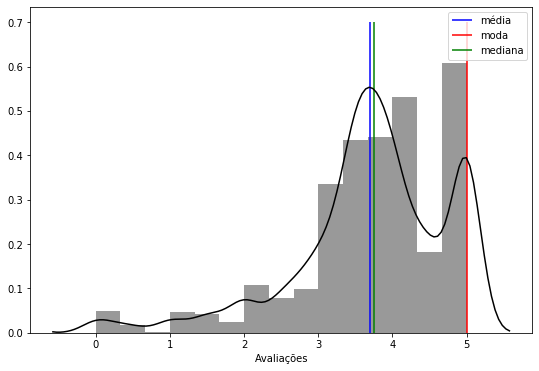

In [15]:
# Distribuição de Densidades das avaliações (Stars)
plt.figure(figsize=(9,6))
m = sn.distplot(ramen['Stars'], hist=True, bins=15, kde=True,color='k')
m1 = plt.vlines(ramen['Stars'].mean(),0,0.7,colors='b',label='média')
m2 =plt.vlines(ramen['Stars'].mode(),0.0,0.7,colors='r',label='moda')
m3 = plt.vlines(ramen['Stars'].median(),0.0,0.7,colors='g',label='mediana')
plt.xlabel('Avaliações')
plt.legend()
plt.show() 

O gráfico da distribuição de densidade das avaliações mostra que temos uma distribuição bimodal (dois picos de maior densidade).

O primeiro pico está centrado na média=3.70, enquanto que o segundo pico de densidade está centrado na moda=5. Vemos que existem poucas avaliações com pontuações abaixo de 3 e uma grande densidade de pontuaações acima de 3, revelando a boa aceitação dos prutos estuados n opinião dos consumidores.

Como definimos antes, os países Japão, Estados Unidos e Coréia do Sul foram os escolhidos por apresentarem maior diversidade de ramens. Agora temos que realizar outra etapa de pré-seleção para os ramens desses países com notas maiores que 4 (uma vez que a média é 3.7) para selecionar os melhores.

In [16]:
# Separa os ramen com avaliações maior igual a 4 nos países Japão e Estados Unidos e Coréia do Sul
jp = ramen.loc[(ramen['Country']=='Japan') & (ramen['Stars']>=4)]
usa = ramen.loc[(ramen['Country']=='United States') & (ramen['Stars']>=4)]
sk = ramen.loc[(ramen['Country']=='South Korea') & (ramen['Stars']>=4)]

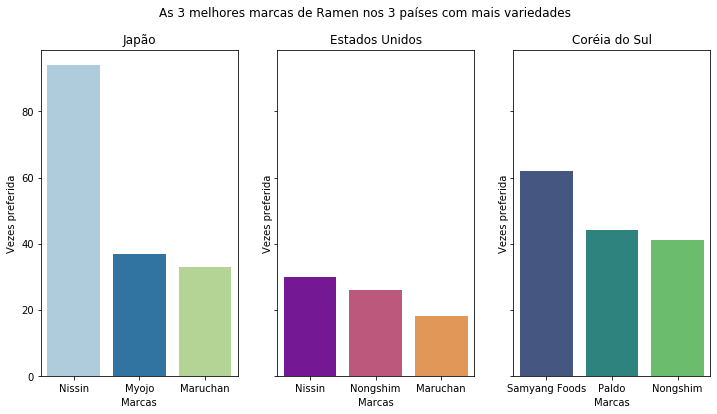

In [17]:
# Desenha os gráficos das maiores marcas 
# nos 3 países coom maaior variedades e ramens
fig, ax = plt.subplots(1,3,figsize=(12,6), sharey=True)
fig.suptitle('As 3 melhores marcas de Ramen nos 3 países com mais variedades')

ax[0].set_title('Japão')
ax[1].set_title("Estados Unidos")
ax[2].set_title('Coréia do Sul')
ax[0].set_ylabel('Vezes preferida')
ax[0].set_xlabel("Marcas")
ax[1].set_ylabel('Vezes preferida')
ax[1].set_xlabel("Marcas")
ax[2].set_ylabel('Vezes preferida')
ax[2].set_xlabel("Marcas")

#Japão
x_jp = jp['Brand'].value_counts()
x_jp = x_jp[:3,]
sn.barplot(ax=ax[0], x=x_jp.index,y=x_jp.values, palette='Paired')

#EstadosUnidos
x_usa = usa['Brand'].value_counts()
x_usa = x_usa[:3,]
sn.barplot(ax=ax[1], x=x_usa.index,y=x_usa.values, palette='plasma')

#Coréia do Sul
x_sk = sk['Brand'].value_counts()
x_sk = x_sk[:3,]
sn.barplot(ax=ax[2], x=x_sk.index,y=x_sk.values, palette='viridis')

plt.show()

A marca *Nissin* aparece liderando as avaliações no Japão e Estados Unidos. Essa marca também existe no Brasil, assim podemos comparar as preferências de ramen nos países Japão e Estados Unidos com as preferências no Brasil. 

No japão, a marca *Nissin* recebeu melhores avaliações nos seus produtos que nos Estados Unidos. Podemos induzir que a preferência dos brasileiros está mais próximo dos japoneses do que dos norte-americanos, uma vez que a *Nissin* é a marca mais famosa no Brasil. Portanto, nossa primeira comparação será entre as marcas mais famosas no Japão, **Myojo* e Murcham**, sendo que esta última também está entre as preferidas dos norte-americanos.

A marca **Nongshim** aparece entre as mais bem avaliadas dos norte-americanos e sul-coreanos. Iremos fazer uma comparação extra entre essa marca e a **Samyang Foods**, que é a mais bem avaliada dos sul-coreanos.

### 1.4 Considerações da parte 1

As marcas de ramen que foram pré-selecionadas para a próxima parte do projeto são:

* Comparação Principal: As melhores avaliadas no Japão, **Myojo e Maruchan**
* Comparação Extra: As marcas **Nongshim e Samyang Foods**.

Para qualquer marca escolhida, a **embalagem do tipo pacote é a mais preferida**.


## Parte 2 - Premiando a Melhor Marca

Criar um modelo para escolher entre as novas marcas de ramen pré-selecionadas na parte 1 do projeto usando inferência Bayesiana.

### 2.1 Por que usar Inferência Bayesiana?

A inferência bayesiana consiste na avaliação de hipóteses pela máxima verossimilhança, ou seja, posto um conjunto de dados e um modelo estatístico, o método de máxima verossimilhança estima os valores dos diferentes parâmetros do modelo estatístico de maneira a maximizar a probabilidade dos dados observado.

O objetivo da inferência Bayesiana consiste em combinar toda a informação/probabilidade subjetiva disponível referente a um problema, com a informação proveniente dos dados observados, através de declaações probabilísticas via teorema de Bayes. Informalmente, podemos definir a probabilidade subjetiva como a crença que o observador do experimento possui na ocorrência do evento de interesse.

No nosso caso e estudo, a probabilidade subjetiva está relacionada com a crença de que o gosto dos consumidores de ramen é semelhante tanto no Brasil quanto em outros países, assim, um ramem que faça sucesso no Japão (país com maior consumo/variedade do produto) possa ser sucesso no Brasil. 


### 2.2 Gerando Classificações 

Nessa seção, iremos classificar as avaliações como positivas ou negativas.

Primeiro temos que rsepara os ramens pelas marcas.

In [18]:
# Separar as avaliações  da marca "myojo"
myojo = ramen.loc[ramen['Brand'] == "Myojo"]
myojo_rank = myojo['Stars'].value_counts().sort_index()

# Separar as avaliações da marca "maruchan"
maruchan = ramen.loc[ramen['Brand'] == "Maruchan"]
maruchan_rank = maruchan['Stars'].value_counts().sort_index()

# Separar as avaliações da marca "nongshim"
nongshim = ramen.loc[ramen['Brand'] == "Nongshim"]
nongshin_rank = nongshim['Stars'].value_counts().sort_index()

# Separar as avaliações da marca "samyang Foods"
samyang = ramen.loc[ramen['Brand'] == "Samyang Foods"]
samyang_rank = samyang['Stars'].value_counts().sort_index()

A coluna Stars possui avaliações que variam de 0.0 a 5.0. Excluindo os valores médios, que são notas em torno de 3.7, usaremos as avaliações de 0.0 até 3.0 como negativas, e as avaliações de 4.0 até 5.0 como positivas.

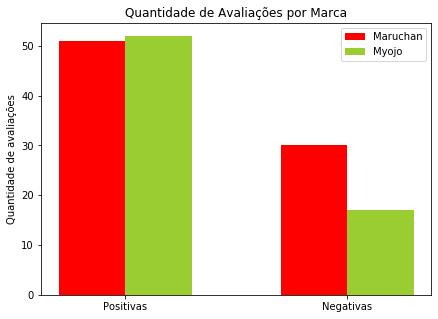

In [19]:
#myojo 
#avaliações negativas
myo_neg = myojo_rank.loc[(myojo_rank.index <= 3)].sum() # avaliações menor ou igual a 3.0
#avaliações positivas
myo_pos = myojo_rank.loc[(myojo_rank.index >= 4 )].sum() # avaliações maiores ou igual a 4.0

#maruchan
# avaliações negativas
ma_neg = maruchan_rank.loc[(maruchan_rank.index <= 3)].sum()  
#avaliações positivas
ma_pos = maruchan_rank.loc[(maruchan_rank.index >= 4 )].sum() 

# gráficos do número de avaliações positivas e negativas de cada marca
labels = ['Positivas', 'Negativas']
x = np.arange(len(labels))
width = 0.3
fig, ax = plt.subplots(figsize=(7,5))
rects1 = ax.bar(x-width/2, [ma_pos,ma_neg], width=width, color='red', label="Maruchan")
rects2 = ax.bar(x+width/2, [myo_pos,myo_neg], width=width, color='yellowgreen', label='Myojo')
ax.legend()

ax.set_ylabel('Quantidade de avaliações')
ax.set_title('Quantidade de Avaliações por Marca')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

A marca *Myojo* possui mais avaliações positivas, enquanto que a marca *Maruchan* possui mais avaliações negativas.

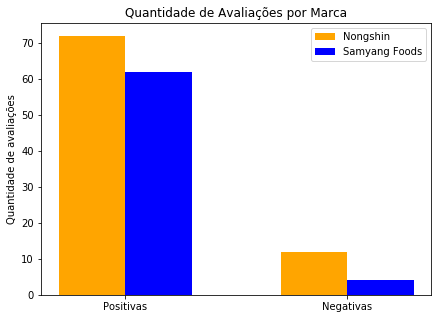

In [20]:
#nongshin
# avaliações negativas
nsh_neg = nongshin_rank.loc[(nongshin_rank.index <= 3)].sum()  
#avaliações positivas
nsh_pos = nongshin_rank.loc[(nongshin_rank.index >= 4 )].sum() 

#samyang
# avaliações negativas
syg_neg = samyang_rank.loc[(samyang_rank.index <= 3)].sum()  
#avaliações positivas
syg_pos = samyang_rank.loc[(samyang_rank.index >= 4 )].sum() 

# gráficos do número de avaliações positivas e negativas de cada marca
labels = ['Positivas', 'Negativas']
x = np.arange(len(labels))
width = 0.3
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title("Número de avaliações")
rects1 = ax.bar(x-width/2, [nsh_pos,nsh_neg], width=width, color='orange', label="Nongshin")
rects2 = ax.bar(x+width/2, [syg_pos,syg_neg], width=width, color='blue', label='Samyang Foods')
ax.legend()

ax.set_ylabel('Quantidade de avaliações')
ax.set_title('Quantidade de Avaliações por Marca')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

A Marca *Nongshin* possui mais avaliações tanto positivas quanto negativas que a marca *Samyang*.

### 2.3 Inferência Bayesiana

Para fazer inferência Bayesiana usaremos a fórmula de Bayes:

$\frac{P(avaliacoes|positiva)*P(positiva )}{P(avaliacoes)} = P(positiva|avaliacoes)$,  

sendo:

#### prior -> $P(positiva)$

#### posteriori -> $P(positiva|avaliacoes)$

#### verossimilhança -> $P(avaliacoes|positiva)$

#### evidências (dados) -> $P(avaliacoes)$

As evidências são as classificações criadas (positiva-1 ou negativa-0). Então criamos um série com esses classificações para cada marca, depois as misturamos (embaralhamos) as para evitar amostras viciadas.

In [21]:
# Dados Myojo
Myj = np.array([0]*(myo_neg) + [1]*(myo_pos)) # [0] são as avaliações negativas e [1] as positivas
Myj = np.random.shuffle(Myj) # 'embaralha' os valores

# Dados Maruchan
Mch = np.array([0]*(ma_neg) + [1]*(ma_pos))
Mch = np.random.shuffle(Mch)

# Dados Nongshin
Nsh = np.array([0]*(nsh_neg) + [1]*(nsh_pos))
Nsh = np.random.shuffle(Nsh)

# Dados Samyang
Syg = np.array([0]*(syg_neg) + [1]*(syg_pos))
Syg = np.random.shuffle(Syg)


Usaremos o pacote *PyMC3*, é um pacote *Python* para modelagem estatística Bayesiana e aprendizado de máquina probabilístico.

As probabilidades *a priori* é uma distribuição beta, com valores entre 0 e 1 e seu formato  é definidos por dois parâmetros ($\alpha$ e $\beta$). São esses parâmtros que representam a nossa crença inicial. Se temos uma crença numa alta probabilidade, então $\alpha$ e $\beta$ devem ser escolhidos para que a maior densidade da distribuição esteja localizada próximo de 1. Se a crença é numa baixa probabilidade, então a densidade e distribuição deve estar localizada próximo de 0.

As probabilidade *posteriori* ou evidências, por se tratarem de um caso informações binário (0 ou 1), usaremos uma distribuição de Bernoulli que descreve muito bem essa situação.

In [43]:
with pm.Model() as projeto:
    # 1. prior (Distribuição Beta)
    
    # Pelo nome 'myojo' ser conhecido no Brasil e ser a segunda melhor classificada no Japão, 
    # suponhamos uma alta probabilidade de ser avaliada como positiva no Brasil.
    p_myo = pm.Beta('p_myo', 8, 2)

    # A marca 'maruchan' foi a terceira classificada no Japão,
    #  suponhamos uma boa probabilidade de ser avaliada como positiva no Brasil
    p_mch = pm.Beta('p_mch', 5, 2) 

    # Marca 'nongshin' aparece com poucas classificações nos Estados Unidos e Coréia do Sul,
    # suponhamos tendência em receber poucas avaliações positivas
    p_nsh = pm.Beta('p_nsh', 5, 4) 

    # A marca 'samyang foods' foi a melhor classificada na Coréia do Sul com muitas classificações,
    # supanhamos uma boa probabilidade de ser avaliada como positiva 
    p_syg = pm.Beta('p_syg', 5, 2)
        
    # 2. posterior ou evidências (Distribuição de Bernoulli)
    evidencia_myo = pm.Bernoulli('evidencia_myo', p_myo, observed=Myj)
    evidencia_mch = pm.Bernoulli('evidencia_mch', p_mch, observed=Mch)
    evidencia_nsh = pm.Bernoulli('evidencia_nsh', p_nsh, observed=Nsh)  
    evidencia_syg = pm.Bernoulli('evidencia_syg', p_mch, observed=Syg) 

    # Calcula a diferença ente as distribuições
    dif = pm.Deterministic('dif', p_myo - p_mch)     
    dif2 = pm.Deterministic('dif2', p_nsh - p_syg)

    # verossimilhança 
    # Técnica de amostragem (sample) para definir a *posterior* real
    # usa o método e Metropolis
    pista = pm.sample(draws=3000, step=pm.Metropolis())
    pista2 = pm.sample(draws=3000, step=pm.Metropolis())

ipykernel_launcher:33: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [evidencia_syg]
>Metropolis: [evidencia_nsh]
>Metropolis: [evidencia_mch]
>Metropolis: [evidencia_myo]
>Metropolis: [p_syg]
>Metropolis: [p_nsh]
>Metropolis: [p_mch]
>Metropolis: [p_myo]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 48 seconds.
The number of effective samples is smaller than 25% for some parameters.
ipykernel_launcher:34: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [evidencia_syg]
>Metropolis: [evidencia_nsh]
>Metropolis: [evidencia_mch]
>Metropolis: [evidencia_myo]
>Metropolis: [p_syg]
>Metropolis: [p_nsh]
>Metropolis: [p_mch]
>Metropolis: [p_myo]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 50 seconds.
The number of effective samples is smaller than 25% for some parameters.


 Vamos olhar a distribuição *posterior* usada como probabilidade subjetiva para cada marca de ramen.

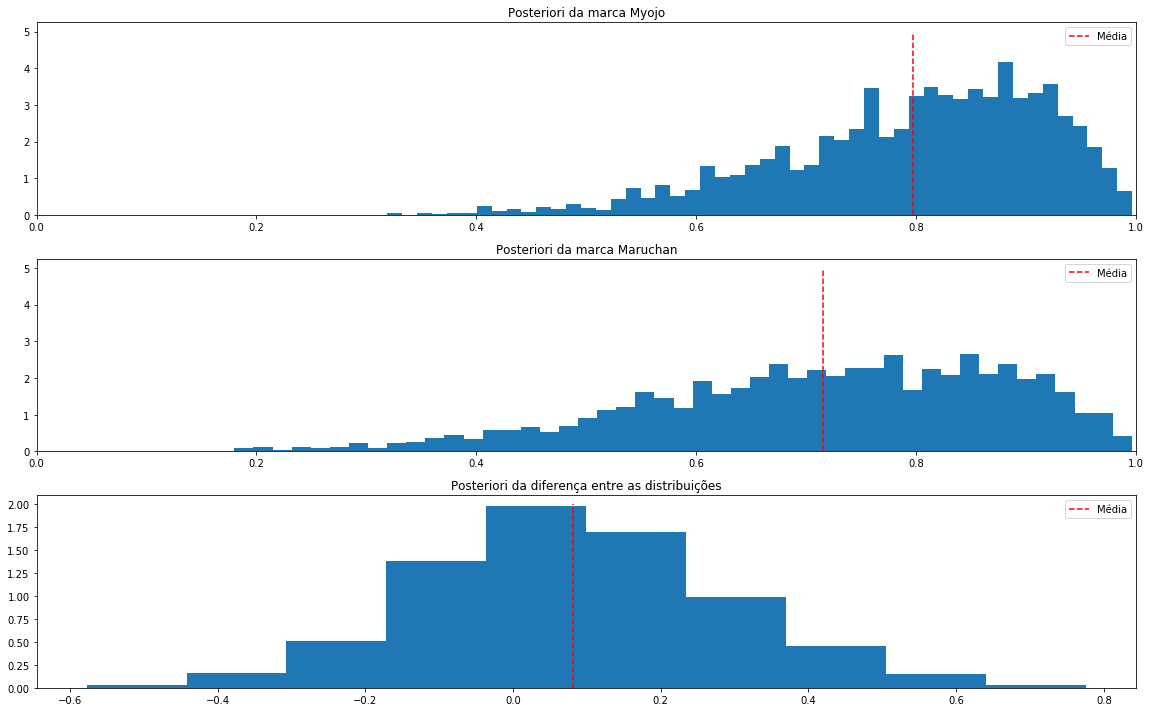

In [44]:
# Escolha Principal

plt.figure(figsize=(16,10))

plt.subplot(311)
plt.hist(pista['p_myo'], bins=50, histtype='barstacked', density=True)
plt.xlim([0,1.0])
plt.vlines(pista['p_myo'].mean(),0,5,linestyles='--', color='red', label="Média")
plt.legend()
plt.title("Posteriori da marca Myojo")

plt.subplot(312)
plt.hist(pista['p_mch'], bins=50, histtype='barstacked', density=True)
plt.xlim([0,1.0])
plt.vlines(pista['p_mch'].mean(),0,5,linestyles='--', color='red', label="Média")
plt.legend()
plt.title("Posteriori da marca Maruchan")

plt.subplot(313)
plt.hist(pista['dif'], histtype='barstacked', density=True)
plt.vlines(pista['dif'].mean(),0,2,linestyles='--', color='red', label="Média")
plt.legend()
plt.title('Posteriori da diferença entre as distribuições')

plt.tight_layout()
plt.show()

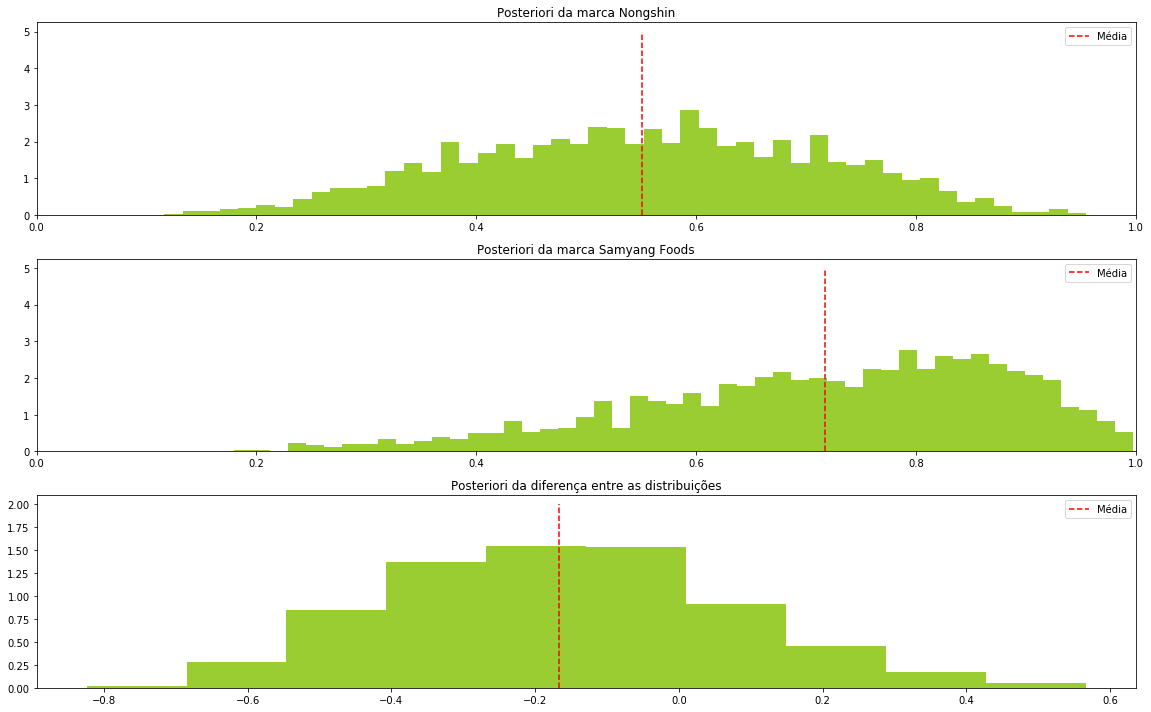

In [46]:
# Escolha Extra

plt.figure(figsize=(16,10))

plt.subplot(311)
plt.hist(pista2['p_nsh'], bins=50, histtype='barstacked', density=True, color='yellowgreen')
plt.xlim([0,1.0])
plt.vlines(pista2['p_nsh'].mean(),0,5,linestyles='--', color='red', label="Média")
plt.legend()
plt.title("Posteriori da marca Nongshin")

plt.subplot(312)
plt.hist(pista2['p_syg'], bins=50, histtype='barstacked', density=True,color='yellowgreen')
plt.xlim([0,1.0])
plt.vlines(pista2['p_syg'].mean(),0,5,linestyles='--', color='red', label="Média")
plt.legend()
plt.title("Posteriori da marca Samyang Foods")

plt.subplot(313)
plt.hist(pista2['dif2'], histtype='barstacked', density=True,color='yellowgreen')
plt.vlines(pista2['dif2'].mean(),0,2,linestyles='--', color='red', label="Média")
plt.legend()
plt.title('Posteriori da diferença entre as distribuições')

plt.tight_layout()
plt.show()

As médias (pico) das distribuiçõs das posteriores fornecem as probabilidades de avaliações positivas.

A largura da distribuição dá a incerteza da estimativa. Distribuição mais curta tem incerteza menore, enquanto que distribuição mais larga posuem incerteza maior.

**A posteriori entre a diferença das distribuições forne a probabilidade de cada escolha. A média dos valores sendo positiva dá a probailidade de gostar mais da primeira marca, enquanto que a média dos valores sendo negativa dá probabilidade e gostar mais da segunda marca.**

### 2.3 Considerações da parte 2

In [49]:
print("Escolha Principal: Entre as marcas Myojo e Murcahn")
print('Probabilidade do consumidor brasileiro gostar mais do ramen da Myojo: {:.2f}'.format(np.mean( pista['dif'] > 0)))
print('Probabilidade do consumidor brasileiro gostar mais do ramen da Murchan: {:.2f}'.format(np.mean( pista['dif'] < 0)))
print()
print("Escolha Extra: Entre as marcas Nongshin e Samygan Foods")
print('Probabilidade do consumidor brasileiro gostar mais do ramen da Nongshin: {:.2f}'.format(np.mean( pista['dif2'] > 0)))
print('Probabilidade do consumidor brasileiro gostar mais do ramen da Samyang Foods: {:.2f}'.format(np.mean( pista['dif2'] < 0)))


Escolha Principal: Entre as marcas Myojo e Murcahn
Probabilidade do consumidor brasileiro gostar mais do ramen da Myojo: 0.65
Probabilidade do consumidor brasileiro gostar mais do ramen da Murchan: 0.35

Escolha Extra: Entre as marcas Nongshin e Samygan Foods
Probabilidade do consumidor brasileiro gostar mais do ramen da Nongshin: 0.25
Probabilidade do consumidor brasileiro gostar mais do ramen da Samyang Foods: 0.75


## Conclusão do Projeto

Existe uma grande probabilidade dos ramens das marcas **Myojo e Samyang Foods, ambas com embalagens em pacote** serem sucesso pelos consumidores brasileiros.

Observação: O que determina o resultado é a informação subjetiva *a priori*. Os pesos das probabilidades (valores dos parâmetros $\alpha$ e $\beta$ na distribuição beta), que são escolhidas pela crença inicial, é o fator regente no resultado. Se escolhermos outras valores de parâmetros que descrevem outra crença inicial, teremos um resultado diferente.